# "Recognizing Hand written Digits with deep learning"
> "I trained the model with models written from scratch as well as pre trained models"

- toc: true
- branch: master
- badges: true
- comments: true
- categories: [fastpages, jupyter]
- image: images/MNIST/mnist.png
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2

Importing FAST AI

In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

/opt/conda/envs/fastai/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 10010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729096996/work/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

Downloading MNIST Dataset

In [3]:
path = untar_data(URLs.MNIST)

In [4]:
Path.BASE_PATH = path

Checking the list of files and directories in the path

In [6]:
(path/'training').ls()

(#10) [Path('training/0'),Path('training/2'),Path('training/9'),Path('training/8'),Path('training/7'),Path('training/1'),Path('training/5'),Path('training/4'),Path('training/6'),Path('training/3')]

Getting the files from the directory

In [7]:
zeroes = (path/'training'/'0').ls().sorted()
ones = (path/'training'/'1').ls().sorted()
twos = (path/'training'/'2').ls().sorted()
threes = (path/'training'/'3').ls().sorted()
fours = (path/'training'/'4').ls().sorted()
fives = (path/'training'/'5').ls().sorted()
sixes = (path/'training'/'6').ls().sorted()
sevens = (path/'training'/'7').ls().sorted()
eights = (path/'training'/'8').ls().sorted()
nines = (path/'training'/'9').ls().sorted()



Displaying an image

In [8]:
im3_path = ones[1]
im3 = Image.open(im3_path)
im3

Converting each image to a tensor

In [9]:
zero_tensors = [tensor(Image.open(o)) for o in zeroes]
one_tensors = [tensor(Image.open(o)) for o in ones]
two_tensors = [tensor(Image.open(o)) for o in twos]
three_tensors = [tensor(Image.open(o)) for o in threes]
four_tensors = [tensor(Image.open(o)) for o in fours]
five_tensors = [tensor(Image.open(o)) for o in fives]
six_tensors = [tensor(Image.open(o)) for o in sixes]
seven_tensors = [tensor(Image.open(o)) for o in sevens]
eight_tensors = [tensor(Image.open(o)) for o in eights]
nine_tensors = [tensor(Image.open(o)) for o in nines]

len(three_tensors),len(seven_tensors)

(6131, 6265)

Stacking each image on top of image to make it a stack of images

In [10]:
stacked_ones = torch.stack(one_tensors).float()/255
stacked_twos = torch.stack(two_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_fours = torch.stack(four_tensors).float()/255
stacked_fives = torch.stack(five_tensors).float()/255
stacked_sixes = torch.stack(six_tensors).float()/255
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_eights = torch.stack(eight_tensors).float()/255
stacked_nines = torch.stack(nine_tensors).float()/255
stacked_zeroes = torch.stack(zero_tensors).float()/255



Same for validation set

In [11]:
valid_0_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'testing'/'0').ls()])
valid_0_tens = valid_0_tens.float()/255
valid_1_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'testing'/'1').ls()])
valid_1_tens = valid_1_tens.float()/255
valid_2_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'testing'/'2').ls()])
valid_2_tens = valid_2_tens.float()/255
valid_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'testing'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_4_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'testing'/'4').ls()])
valid_4_tens = valid_4_tens.float()/255
valid_5_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'testing'/'5').ls()])
valid_5_tens = valid_5_tens.float()/255
valid_6_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'testing'/'6').ls()])
valid_6_tens = valid_6_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'testing'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_8_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'testing'/'8').ls()])
valid_8_tens = valid_8_tens.float()/255
valid_9_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'testing'/'9').ls()])
valid_9_tens = valid_9_tens.float()/255
valid_9_tens.shape,valid_0_tens.shape

(torch.Size([1009, 28, 28]), torch.Size([980, 28, 28]))

In [12]:
stacked_fives.shape

torch.Size([5421, 28, 28])

We already have our independent variables
x
—these are the images themselves. We'll concatenate them allinto a single tensor, and also change them from a list of matrices (a rank-3 tensor) to a list of vectors (a rank-2tensor). We can do this using
view
, which is a PyTorch method that changes the shape of a tensor withoutchanging its contents.
-1
is a special parameter to
view
that means "make this axis as big as necessary tofit all the data":

In [13]:
train_x = torch.cat([stacked_zeroes,stacked_ones,stacked_twos,stacked_threes,stacked_fours,stacked_fives,
                     stacked_sixes,stacked_sevens,stacked_eights,stacked_nines]).view(-1, 28*28)

Labels for the image

In [14]:
train_y = tensor([0]*len(zeroes) + [1]*len(ones)+[2]*len(twos)+[3]*len(threes)+[4]*len(fours)+[5]*len(fives)+
                [6]*len(sixes)+[7]*len(sevens)+[8]*len(eights)+[9]*len(nines)).unsqueeze(1)
train_x.shape,train_y.shape

(torch.Size([60000, 784]), torch.Size([60000, 1]))

A
Dataset
in PyTorch is required to return a tuple of
(x,y)
when indexed. Python provides a
zip
functionwhich, when combined with
list
, provides a simple way to get this functionality:

In [15]:
dset = list(zip(train_x,train_y))
x,y = dset[0]
x.shape,y

(torch.Size([784]), tensor([0]))

In [16]:
valid_x = torch.cat([valid_0_tens,valid_1_tens,valid_2_tens,valid_3_tens,valid_4_tens,valid_5_tens,
                     valid_6_tens,valid_7_tens,valid_8_tens,valid_9_tens]).view(-1, 28*28)
valid_y = tensor([0]*len(valid_0_tens) + [1]*len(valid_1_tens)+[2]*len(valid_2_tens)+[3]*len(valid_3_tens)+
                 [4]*len(valid_4_tens)+[5]*len(valid_5_tens)+
                 [6]*len(valid_6_tens)+[7]*len(valid_7_tens)+[8]*len(valid_8_tens)+[9]*len(valid_9_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

Getting initial weights

In [25]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

Using sigmoid function for loss so that the values remain between 0 and 1

In [17]:
def sigmoid(x): return 1/(1+torch.exp(-x))

Calculating Loss

In [18]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

Calculating accuracy

In [19]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

Using a batch to train data instead of using all images or one image

In [20]:
dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)
xb.shape,yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [21]:
valid_dl = DataLoader(valid_dset, batch_size=256)

In [22]:
dls = DataLoaders(dl, valid_dl)

nn.Linear
does the same thing as our
init_params
and
linear
together. It contains both the
weights
and
biases
in a single class. Here's how we replicate our model from the previous section:

In [23]:
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

Fitting our model with a learning rate of 0.1

In [24]:
learn.fit(10, lr=0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.008503,0.105249,0.098000,00:01
1,0.008825,0.084339,0.115600,00:01
2,0.008145,0.066740,0.149700,00:01
3,0.008239,0.054698,0.167500,00:01
4,0.008395,0.046343,0.177900,00:01
5,0.008524,0.040353,0.184600,00:01
6,0.008615,0.035921,0.190000,00:01
7,0.008673,0.032544,0.192300,00:01
8,0.008706,0.029901,0.193700,00:01
9,0.008720,0.027785,0.195100,00:01


Making a simple neuronet by adding non linearity and adding layers

In [26]:


def simple_net(xb): 
    res = xb@w1 + b1
    res = res.max(tensor(0.0))
    res = res@w2 + b2
    return res

In [27]:


w1 = init_params((28*28,30))
b1 = init_params(30)
w2 = init_params((30,1))
b2 = init_params(1)


In [28]:

simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1),
    
)

In [29]:
learn = Learner(dls, simple_net, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)


In [30]:
learn.fit(40,0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.007038,0.109438,0.098000,00:01
1,0.005165,0.092503,0.104900,00:01
2,0.003502,0.077504,0.132400,00:01
3,0.003200,0.067543,0.146500,00:01
4,0.003107,0.060508,0.155700,00:01
5,0.003079,0.055172,0.162000,00:01
6,0.003078,0.050902,0.167500,00:01
7,0.003089,0.047355,0.171100,00:01
8,0.003104,0.044345,0.173700,00:01
9,0.003119,0.041761,0.176500,00:01


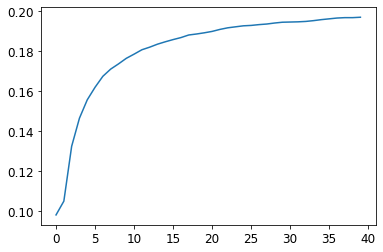

In [31]:
plt.plot(L(learn.recorder.values).itemgot(2));

In [32]:
learn.recorder.values[-1][2]

0.19709999859333038

As you can see after appying neural net the accuracy is around 20% which is not satisfactory.

We already know that a single nonlinearity with two linear layers is enough to approximate any function. Sowhy would we use deeper models? The reason is performance. With a deeper model (that is, one with morelayers) we do not need to use as many parameters; it turns out that we can use smaller matrices with morelayers, and get better results than we would get with larger matrices, and few layers.
That means that we can train the model more quickly, and it will take up less memory. In the 1990s researcherswere so focused on the universal approximation theorem that very few were experimenting with more than onenonlinearity. This theoretical but not practical foundation held back the field for years. Some researchers,however, did experiment with deep models, and eventually were able to show that these models could performmuch better in practice. Eventually, theoretical results were developed which showed why this happens. Today,it is extremely unusual to find anybody using a neural network with just one nonlinearity.

#### Using 18 layers pre trained model

In [34]:
db = ImageDataLoaders.from_folder(path=path, train='training', test='testing', valid_pct=0.2);
db

In [35]:
learn = cnn_learner(db, resnet18, pretrained=False,
                    loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(1, 0.01)

epoch,train_loss,valid_loss,accuracy,time
0,0.060049,0.039713,0.989357,08:18


## And now the accuracy jumps to 98.9%